In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import xml.etree.ElementTree as ET

tree= ET.parse("/kaggle/input/fruits-images/annotations.xml")
root= tree.getroot()

data=[]
for image in root.findall("image"):
    name= image.get('name')
    width = int(image.get('width'))
    height= int(image.get('height'))

    for box in image.findall('box'):
        label = box.get('label')
        xtl= float(box.get('xtl'))
        ytl=float(box.get('ytl'))
        xbr=float(box.get('xbr'))
        ybr=float(box.get('ybr'))

        data.append([name,width,height,label,xtl,ytl,xbr,ybr])

df= pd.DataFrame(data,columns=['name','width','height','label','xtl','ytl','xbr','ybr'])
df

,name,width,height,label,xtl,ytl,xbr,ybr
0,fruits/apple_1.jpg,349,349,apple,8.91,1.14,330.27,347.26
1,fruits/apple_10.jpg,1500,1500,apple,49.50,43.32,1467.82,1422.03
2,fruits/apple_11.jpg,652,436,apple,3.22,0.77,392.26,247.88
3,fruits/apple_12.jpg,450,428,apple,34.34,20.14,424.90,378.22
4,fruits/apple_13.jpg,800,800,apple,405.31,259.44,743.27,565.71
...,...,...,...,...,...,...,...,...
275,fruits/orange_74.jpg,500,380,orange,12.37,27.30,500.00,364.66
276,fruits/orange_75.jpg,600,600,orange,64.36,84.65,535.64,544.06
277,fruits/orange_76.jpg,1620,1080,orange,6.25,73.73,1613.70,1080.00
278,fruits/orange_8.jpg,600,393,orange,40.10,36.72,549.27,384.12


In [3]:
import os

see= ["/kaggle/input/fruits-images/fruits/fruits/" + k for k in os.listdir("/kaggle/input/fruits-images/fruits/fruits/")]
len(see)

220

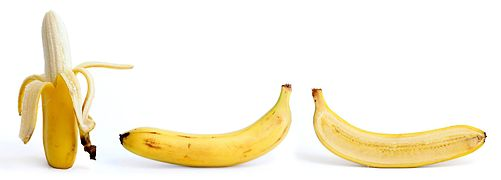

In [4]:

from IPython.display import Image
Image(see[13])

In [5]:
df.head()

,name,width,height,label,xtl,ytl,xbr,ybr
0,fruits/apple_1.jpg,349,349,apple,8.91,1.14,330.27,347.26
1,fruits/apple_10.jpg,1500,1500,apple,49.50,43.32,1467.82,1422.03
2,fruits/apple_11.jpg,652,436,apple,3.22,0.77,392.26,247.88
3,fruits/apple_12.jpg,450,428,apple,34.34,20.14,424.90,378.22
4,fruits/apple_13.jpg,800,800,apple,405.31,259.44,743.27,565.71


In [6]:
import warnings
warnings.filterwarnings("ignore")


In [7]:
start='/kaggle/input/fruits-images/fruits/'

for idx, value in enumerate(df['name']):
    # print(value)
    change= start + value
    df['name'].iloc[idx] = change
df.head()

,name,width,height,label,xtl,ytl,xbr,ybr
0,/kaggle/input/fruits-images/fruits/fruits/appl...,349,349,apple,8.91,1.14,330.27,347.26
1,/kaggle/input/fruits-images/fruits/fruits/appl...,1500,1500,apple,49.50,43.32,1467.82,1422.03
2,/kaggle/input/fruits-images/fruits/fruits/appl...,652,436,apple,3.22,0.77,392.26,247.88
3,/kaggle/input/fruits-images/fruits/fruits/appl...,450,428,apple,34.34,20.14,424.90,378.22
4,/kaggle/input/fruits-images/fruits/fruits/appl...,800,800,apple,405.31,259.44,743.27,565.71


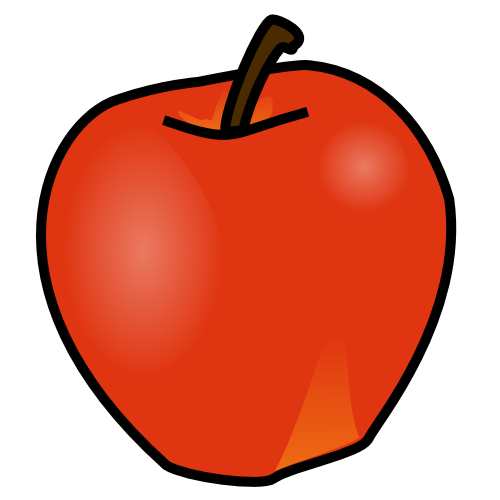

In [8]:
Image(df['name'][13])

In [9]:
see[1][:34]

'/kaggle/input/fruits-images/fruits'

In [10]:
df=df.sample(frac=1,ignore_index=True)
df

,name,width,height,label,xtl,ytl,xbr,ybr
0,/kaggle/input/fruits-images/fruits/fruits/bana...,615,865,banana,51.34,58.48,499.54,827.84
1,/kaggle/input/fruits-images/fruits/fruits/oran...,300,280,orange,60.35,47.37,248.86,265.00
2,/kaggle/input/fruits-images/fruits/fruits/bana...,478,224,banana,86.88,40.98,409.59,159.82
3,/kaggle/input/fruits-images/fruits/fruits/oran...,1999,1200,orange,1051.47,236.62,1510.90,890.44
4,/kaggle/input/fruits-images/fruits/fruits/appl...,300,227,apple,40.64,35.58,150.02,146.83
...,...,...,...,...,...,...,...,...
275,/kaggle/input/fruits-images/fruits/fruits/oran...,1999,1200,orange,622.95,141.64,1042.63,556.91
276,/kaggle/input/fruits-images/fruits/fruits/bana...,300,180,banana,2.14,58.66,296.80,169.38
277,/kaggle/input/fruits-images/fruits/fruits/oran...,1024,640,orange,26.60,224.38,999.70,609.09
278,/kaggle/input/fruits-images/fruits/fruits/appl...,333,300,apple,12.28,23.51,280.10,280.94


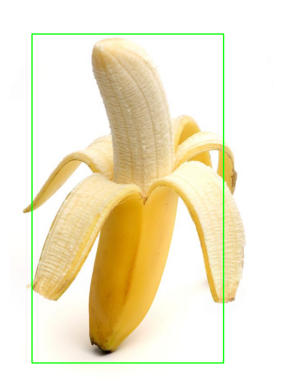

In [11]:
import cv2
def show_image(image_path, boxes):
    image = cv2.imread(image_path)
    for box in boxes:
        xtl, ytl, xbr, ybr = box
        cv2.rectangle(image, (int(xtl), int(ytl)), (int(xbr), int(ybr)), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
show_image(see[23], df[df['name'] == see[23]][['xtl', 'ytl', 'xbr', 'ybr']].values.tolist())

##  Preprocessing: Image Rescaling and Padding

To ensure all images have a consistent size (480×480), we perform a **letterbox-style transformation**:
- **Scaling**: Images are scaled so the longer side fits within a 480-pixel boundary, while maintaining the aspect ratio.
- **Padding**: After scaling, padding is added symmetrically (left/right or top/bottom) to center the image in a square canvas.

We compute:
- `scaling_factor`: how much to scale each image to fit within the 480×480 box.
- `pad_x` and `pad_y`: the number of pixels to pad horizontally and vertically, respectively.

This step is essential for standardizing input dimensions for machine learning models.


In [12]:
const= 480
pad_x=[]
pad_y=[]
scaling_=[]
for idx ,row in df.iterrows():
    scaling_factor= min(const/row['width'], const/row['height'])
    scaling_.append(scaling_factor)
    scaled_width = row['width'] * scaling_factor
    scaled_height = row['height'] * scaling_factor
    pad_x.append((const- scaled_width) / 2)
    pad_y.append((const- scaled_height) / 2)

df['pad_x'] = pad_x
df['pad_y'] = pad_y
df['scaling'] = scaling_
df


,name,width,height,label,xtl,ytl,xbr,ybr,pad_x,pad_y,scaling
0,/kaggle/input/fruits-images/fruits/fruits/bana...,615,865,banana,51.34,58.48,499.54,827.84,69.364162,2.842171e-14,0.554913
1,/kaggle/input/fruits-images/fruits/fruits/oran...,300,280,orange,60.35,47.37,248.86,265.00,0.000000,1.600000e+01,1.600000
2,/kaggle/input/fruits-images/fruits/fruits/bana...,478,224,banana,86.88,40.98,409.59,159.82,0.000000,1.275314e+02,1.004184
3,/kaggle/input/fruits-images/fruits/fruits/oran...,1999,1200,orange,1051.47,236.62,1510.90,890.44,0.000000,9.592796e+01,0.240120
4,/kaggle/input/fruits-images/fruits/fruits/appl...,300,227,apple,40.64,35.58,150.02,146.83,0.000000,5.840000e+01,1.600000
...,...,...,...,...,...,...,...,...,...,...,...
275,/kaggle/input/fruits-images/fruits/fruits/oran...,1999,1200,orange,622.95,141.64,1042.63,556.91,0.000000,9.592796e+01,0.240120
276,/kaggle/input/fruits-images/fruits/fruits/bana...,300,180,banana,2.14,58.66,296.80,169.38,0.000000,9.600000e+01,1.600000
277,/kaggle/input/fruits-images/fruits/fruits/oran...,1024,640,orange,26.60,224.38,999.70,609.09,0.000000,9.000000e+01,0.468750
278,/kaggle/input/fruits-images/fruits/fruits/appl...,333,300,apple,12.28,23.51,280.10,280.94,0.000000,2.378378e+01,1.441441


## Updating Bounding Boxes after Padding

After padding and scaling, we must transform the original bounding box coordinates accordingly:
- Each bounding box (`xtl`, `ytl`, `xbr`, `ybr`) is scaled and then shifted by the padding values.
- Final bounding box values are normalized to the `[0, 1]` range by dividing by 480.

This ensures that the bounding boxes align with the new padded image dimensions.


In [13]:
boxes=[]
for idx,row in df.iterrows():
    xtl_new= (row['xtl'] * row['scaling']) + row['pad_x']
    ytl_new= (row['ytl'] * row['scaling']) + row['pad_y']
    xbr_new= (row['xbr'] * row['scaling']) + row['pad_x']
    ybr_new= (row['ybr'] * row['scaling']) + row['pad_y']
    boxing=[round(xtl_new/const, 3), round(ytl_new/const, 3), round(xbr_new/const, 3), round(ybr_new/const, 3)]
    boxes.append(boxing)
df['bbox'] = boxes

In [14]:
labels= df['label'].to_numpy()
unique_labels= np.unique(labels)
all_labels= [label == unique_labels for label in labels]
all_labels[:10]

[array([False,  True, False]),
 array([False, False,  True]),
 array([False,  True, False]),
 array([False, False,  True]),
 array([ True, False, False]),
 array([False,  True, False]),
 array([False, False,  True]),
 array([False, False,  True]),
 array([False, False,  True]),
 array([ True, False, False])]

In [15]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=df['name']
y=all_labels
box=df['bbox'].to_list()

x_train,x_test, y_train,y_test,box_train,box_test= train_test_split(
    x,y,box,train_size=0.8,random_state=42
)


In [16]:
unique_labels
import pickle
with open("unique_labels.plk", 'wb') as f:
    pickle.dump(unique_labels,f)

In [17]:
import tensorflow as tf

2025-06-22 18:43:30.143176: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750617810.364983      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750617810.425048      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
def process_image(filepath):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_jpeg(image, channels=3)
    image= tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, (480, 480))
    return image

In [19]:
def get_image_labe_bbox(filepath,label, bbox):
    box_b = tf.convert_to_tensor(bbox)
    image = process_image(filepath)
    return image ,(label, box_b)

In [20]:
def create_batch(x,y=None,bbox_=None,validation_data=False,test_data=False):
    batch_size=32
    if test_data:
        print("Creating testing data batches.....")
        data= tf.data.Dataset.from_tensor_slices((tf.constant(x)))
        data= data.map(process_image).batch(batch_size)
        return data
    elif validation_data:
        print("Creating validation data batches.....")
        data= tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y),tf.cast(bbox_,dtype=tf.float32)))
        data= data.map(get_image_labe_bbox).batch(batch_size)
        return data
    else:
        print("Creating training data batches.....")
        data= tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y),tf.cast(bbox_,dtype=tf.float32)))
        data= data.shuffle(buffer_size=len(x))
        data= data.map(get_image_labe_bbox).batch(batch_size)
        return data


In [21]:
train_data= create_batch(x_train,y_train,box_train)
val_data = create_batch(x_test,y_test,box_test,validation_data=True)

Creating training data batches.....
Creating validation data batches.....


I0000 00:00:1750617822.957684      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750617822.958399      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [22]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 480, 480, 3), dtype=tf.float32, name=None),
  (TensorSpec(shape=(None, 3), dtype=tf.bool, name=None),
   TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))),
 (TensorSpec(shape=(None, 480, 480, 3), dtype=tf.float32, name=None),
  (TensorSpec(shape=(None, 3), dtype=tf.bool, name=None),
   TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))))

In [23]:
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten, Input,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import keras
from tensorflow.keras import regularizers

input_shape=[480,480,3]

padding = same
Try Huber loss
Try MAE -good for outliers



In [24]:
inputs= Input(shape=input_shape)
# Convolutional Base with L2 regularization
x = Conv2D(32, (5, 5), activation='relu', padding='same', name='bl_1',
           kernel_regularizer=regularizers.l2(0.01))(inputs)
x = MaxPooling2D((2, 2), name='bl_2')(x)

x = Conv2D(64, (5, 5), activation='relu', padding='same', name='bl_3',
           kernel_regularizer=regularizers.l2(0.01))(x)
x = MaxPooling2D((4, 4), name='bl_4')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same', name='bl_5',
           kernel_regularizer=regularizers.l2(0.01))(x)
x = MaxPooling2D((4, 4), name='bl_6')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same', name='bl_7',
           kernel_regularizer=regularizers.l2(0.01))(x)
x = MaxPooling2D((2, 2), name='bl_8')(x)

x = Flatten(name='bl_9')(x)

# Classification head
class_output = Dense(32, activation='relu', name='cd')(x)
class_output = Dense(len(unique_labels), activation='softmax', name='cd_head')(class_output)

# Bounding box regression head
bbox_output = Dense(64, activation='relu', name='bb_1')(x)
bbox_output = Dense(32, activation='relu', name='bb_2')(bbox_output)
bbox_output = Dense(16, activation='relu', name='bb_3')(bbox_output)
bbox_output = Dense(4, activation='sigmoid', name='bb_head')(bbox_output)  # sigmoid for normalized coordinates

# Build model
model = Model(inputs=inputs, outputs=[class_output, bbox_output])

# Compile model
model.compile(
    optimizer=Adam(),
    loss={
        'cd_head': tf.keras.losses.CategoricalCrossentropy(),
        'bb_head': tf.keras.losses.Huber(delta=1.0)
    },
    metrics={
        'cd_head': tf.keras.metrics.CategoricalAccuracy(),
        'bb_head': tf.keras.metrics.MeanAbsoluteError()
    }
)

# Model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 480, 480, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bl_1 (Conv2D)             │ (None, 480, 480, 32)   │          2,432 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bl_2 (MaxPooling2D)       │ (None, 240, 240, 32)   │              0 │ bl_1[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bl_3 (Conv2D)             │ (None, 240, 240, 64)   │         51,264 │ bl_2[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bl_4 (MaxPooling2D)       │ (None, 60, 60, 64)     │              0 │ bl_3[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bl_5 (Conv2D)             │ (None, 60, 60, 128)    │         73,856 │ bl_4[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bl_6 (MaxPooling2D)       │ (None, 15, 15, 128)    │              0 │ bl_5[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bl_7 (Conv2D)             │ (None, 15, 15, 256)    │        295,168 │ bl_6[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bl_8 (MaxPooling2D)       │ (None, 7, 7, 256)      │              0 │ bl_7[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bl_9 (Flatten)            │ (None, 12544)          │              0 │ bl_8[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bb_1 (Dense)              │ (None, 64)             │        802,880 │ bl_9[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bb_2 (Dense)              │ (None, 32)             │          2,080 │ bb_1[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cd (Dense)                │ (None, 32)             │        401,440 │ bl_9[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bb_3 (Dense)              │ (None, 16)             │            528 │ bb_2[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cd_head (Dense)           │ (None, 3)              │             99 │ cd[0][0]               │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bb_head (Dense)           │ (None, 4)              │             68 │ bb_3[0][0]             │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,629,815 (6.22 MB)

 Trainable params: 1,629,815 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='cd_head_accuracy',
    patience=3,
    mode='max',
    restore_best_weights=True
)

checkpoint = keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_class_output_accuracy',
    mode='max',
    save_best_only=True
)


In [26]:
model.fit(
    x=train_data,
    validation_data=val_data,
    epochs=100,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/100


I0000 00:00:1750617829.393618     101 service.cc:148] XLA service 0x79296c0142d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750617829.395497     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750617829.395540     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750617830.093545     101 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-22 18:43:58.199891: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,240,240]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,240,240]{3,2,1,0}, f32[64,32,5,5]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_que

7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - bb_head_loss: 0.0348 - bb_head_mean_absolute_error: 0.2302 - cd_head_categorical_accuracy: 0.4019 - cd_head_loss: 1.1732 - loss: 4.0500 - val_bb_head_loss: 0.0188 - val_bb_head_mean_absolute_error: 0.1611 - val_cd_head_categorical_accuracy: 0.3929 - val_cd_head_loss: 1.0895 - val_loss: 3.3415
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - bb_head_loss: 0.0168 - bb_head_mean_absolute_error: 0.1444 - cd_head_categorical_accuracy: 0.4918 - cd_head_loss: 1.0705 - loss: 3.1533 - val_bb_head_loss: 0.0193 - val_bb_head_mean_absolute_error: 0.1642 - val_cd_head_categorical_accuracy: 0.3929 - val_cd_head_loss: 1.0661 - val_loss: 2.6734
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - bb_head_loss: 0.0173 - bb_head_mean_absolute_error: 0.1539 - cd_head_categorical_accuracy: 0.4777 - cd_head_loss: 1.0218 - loss: 2.5077 - val_bb_head_loss: 0.0207 - val_bb_head_mean_absolute_error: 0.1433 - val_cd_head_categorical_accuracy: 0.4286 - val_cd_head_loss:

In [27]:
model.save('matunda_splited_kaggle.keras')

In [28]:
testing_data=create_batch(x_test,test_data=True)

Creating testing data batches.....


In [29]:
predictions= model.predict(testing_data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


In [30]:
def get_pred_label(prob):
    return unique_labels[np.argmax(prob)]

In [31]:
pred_labels= [get_pred_label(predictions[0][i]) for i in range(len(predictions[0]))]
pred_bbox=predictions[1]

In [32]:
val_images=[]
for image in testing_data.unbatch().as_numpy_iterator():
    val_images.append(image)

In [33]:
len(val_images)

56

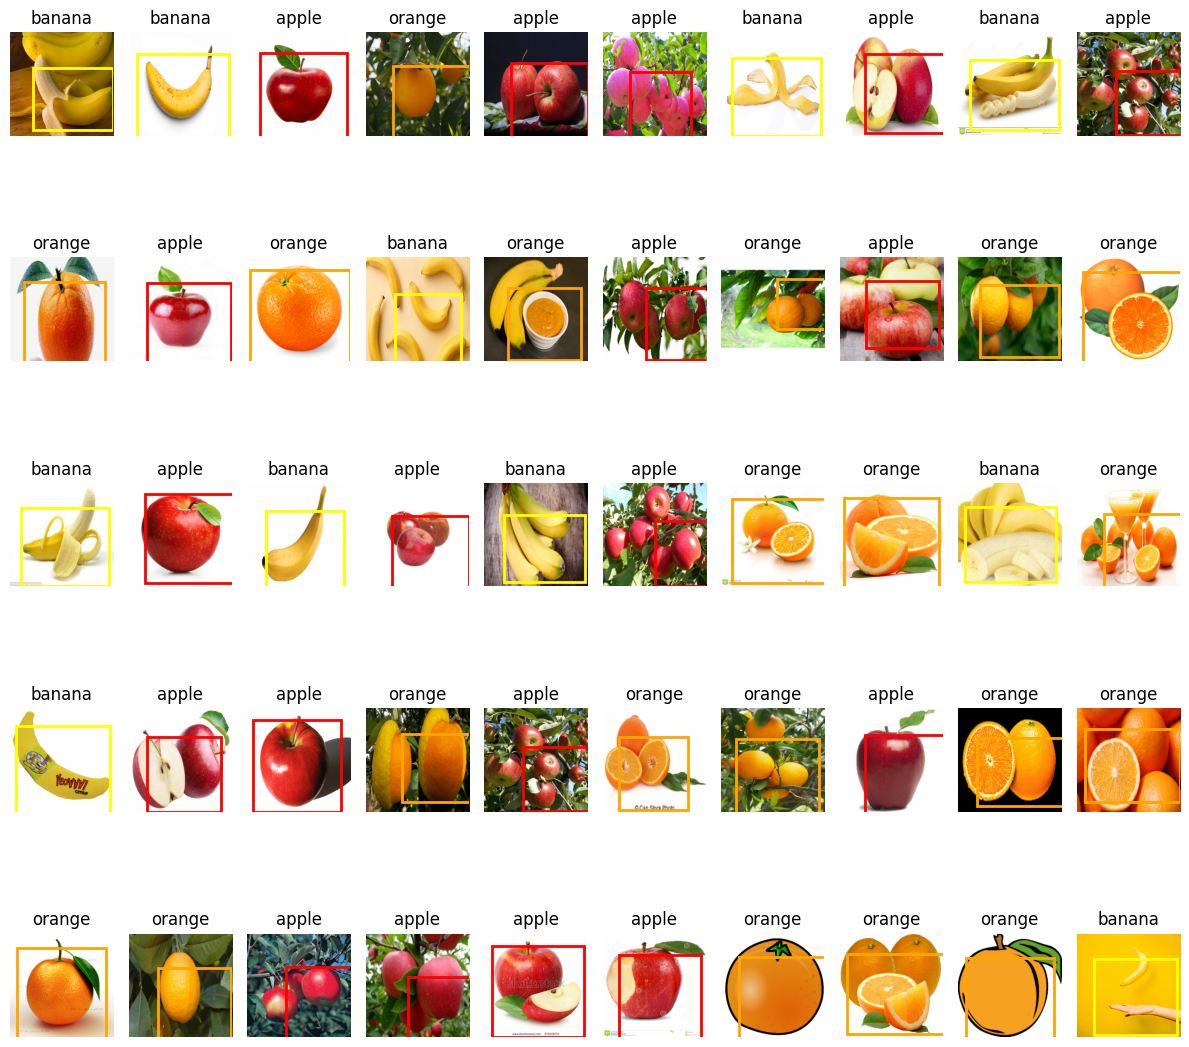

In [34]:
import matplotlib.patches as patches
plt.figure(figsize=(12,12))
for idx,image in enumerate(val_images[:50]):
    plt.subplot(5,10,idx+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(pred_labels[idx])

    a,b,c,d= pred_bbox[idx]

    x=a*480
    y=b*480
    w=c*480
    h=d*480
    ax=plt.gca()
    color_map = {"apple": "red", "banana": "yellow", "orange": "orange"}
    edgecolor = color_map.get(pred_labels[idx], "blue")
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor=edgecolor, facecolor='none')

    ax.add_patch(rect)

plt.tight_layout()
plt.savefig('/kaggle/working/show_pred.png', dpi=300)  # add .png extension

plt.show()
